# Problem 1 {-}

In [1]:
import mnist_assignment_starter as mas
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ShuffleSplit, cross_validate, KFold
from sklearn.svm import SVC

## Problem 1.A {-}

In [136]:
%run mnist_assignment_starter.py

running cross validation...
mean_fit_time: 1.1435162544250488, std_fit_time: 0.0643828178045959
mean_score_time: 0.003731441497802734, std_score_time: 0.00038991255792416907
mean_test_score: 0.9701984275050177, std_test_score: 0.004595986235463537


## Problem 1.B {-}

In [2]:
#Load in the MNIST dataset
Xtrain, ytrain, Xtest, ytest = mas.prepare_data()

In [3]:
#Turn the data into data matrix X consisting of only 7s and 9s
Xtrain, ytrain = mas.filter_out_7_9s(Xtrain, ytrain)
Xtest, ytest = mas.filter_out_7_9s(Xtest, ytest)

In [4]:
#check that the data in the X matrix is all float values and scaled between 0 and 1
print("Data type of X:", np.array(list(Xtrain)).dtype)
print("Is X scaled properly?", np.any(Xtrain <= 1.0) | np.any(Xtrain >= 0.0))
#check that the labels are integers
print("Data type of y:", np.array(list(ytrain)).dtype)

Data type of X: float64
Is X scaled properly? True
Data type of y: int32


In [5]:
#Print out the length of the filtered X and y, alongside the max value of X train and X test
print("Filtered X length:",len(Xtrain))
print("Filtered y length:",len(ytrain))
print("Max X training set value:", np.max(Xtrain))
print("Max X test set value:", np.max(Xtest))

Filtered X length: 12214
Filtered y length: 12214
Max X training set value: 1.0
Max X test set value: 1.0


## Problem 1.C {-}

In [6]:
#Train a classifier using 5-fold cross validation and Decision Tree classifier
part1_C = mas.train_simple_classifier_with_cv(Xtrain, ytrain, DecisionTreeClassifier())
#Print mean and std for accuracy scores and fit time
mas.print_cv_result_dict(part1_C)

mean_fit_time: 1.121250057220459, std_fit_time: 0.08970371877961576
mean_score_time: 0.0034010887145996095, std_score_time: 0.0004906216982818948
mean_test_score: 0.9724907916884993, std_test_score: 0.004380016726586037


## Problem 1.D {-}

In [7]:
#Repeat above steps with a random permuation cross-validator instead
D_clf = DecisionTreeClassifier(random_state = 42)
D_cv = ShuffleSplit(n_splits = 5, random_state = 42)
D_scores = cross_validate(D_clf, Xtrain, ytrain, cv=D_cv)
#Print mean and std for accuracy scores and fit time
mas.print_cv_result_dict(D_scores)

mean_fit_time: 1.2808958530426025, std_fit_time: 0.05155713708237914
mean_score_time: 0.001999235153198242, std_score_time: 1.1243654367972943e-06
mean_test_score: 0.9749590834697217, std_test_score: 0.002567002805459594


## Problem 1.E {-}

In [138]:
#Repeat above for different k's
ks = [2, 5, 8, 16]
for k in ks:
    E_clf = DecisionTreeClassifier(random_state = 42)
    E_cv = ShuffleSplit(n_splits = k, random_state = 42)
    E_scores = cross_validate(E_clf, Xtrain, ytrain, cv=E_cv)
    print("K-value =", k)
    print(f"mean test score of {E_scores['test_score'].mean():.5f} with a standard deviation of {E_scores['test_score'].std():.5f}")
    print("")

K-value = 2
mean test score of 0.97709 with a standard deviation of 0.00164

K-value = 5
mean test score of 0.97496 with a standard deviation of 0.00257

K-value = 8
mean test score of 0.97504 with a standard deviation of 0.00256

K-value = 16
mean test score of 0.97381 with a standard deviation of 0.00386



The mean scores decrease slightly while the standard deviations grow as the k-values increase.

## Problem 1.F {-}

In [9]:
#Train a Support Vector Machine classifier with random permuation cross-validator 
F_clf = SVC(random_state = 42)
F_cv = ShuffleSplit(n_splits = 5, random_state = 42)
F_scores = cross_validate(F_clf, Xtrain, ytrain, cv = F_cv)
#Print mean and std for accuracy scores and fit time
mas.print_cv_result_dict(F_scores)

mean_fit_time: 4.609664821624756, std_fit_time: 0.05118174637890939
mean_score_time: 0.43544759750366213, std_score_time: 0.0025660665598265606
mean_test_score: 0.9898527004909983, std_test_score: 0.003173603834642464


The Support Vector Machine has a higher accuracy on average, but the Decision Tree has lower average variance and trains faster.

## Problem 1.G {-}

In [10]:
#Modify hyperparameters to get better mean accuracy
G_clf = SVC(C = 5.0, random_state = 42)
G_cv = ShuffleSplit(n_splits = 5, random_state = 42)
G_scores = cross_validate(G_clf, Xtrain, ytrain, cv = G_cv)
mas.print_cv_result_dict(G_scores)

mean_fit_time: 4.026003837585449, std_fit_time: 0.07331781100582246
mean_score_time: 0.364882230758667, std_score_time: 0.0073880936216813055
mean_test_score: 0.9931260229132569, std_test_score: 0.0032569146877467095


In [139]:
#Train the classifier on all of the training data
G_model = G_clf.fit(Xtrain, ytrain)
print("Training accuracy:", G_model.score(Xtrain, ytrain))
print("Test accuracy:", G_model.score(Xtest, ytest))

Training accuracy: 0.9993450139184542
Test accuracy: 0.993127147766323


Cross validation splits the whole data into n-splits and performs the validation on that, so the mean accuracy of the cross validation should be similar to the whole set's accuracy, which it is here.

# Problem 2 {-}

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

## Problem 2.A {-}

In [13]:
#Load in the MNIST dataset
Xtrain2, ytrain2, Xtest2, ytest2 = mas.prepare_data()

In [14]:
#print out the number of unique elements in y
print(np.unique(ytrain2))

[0 1 2 3 4 5 6 7 8 9]


## Problem 2.B {-}

In [15]:
#Repeat part 1.C using a multiclass classifier (inherent)
part2B_C = mas.train_simple_classifier_with_cv(Xtrain2, ytrain2, ExtraTreeClassifier(random_state = 42))
#Print mean and std for accuracy scores and fit time
mas.print_cv_result_dict(part2B_C)

mean_fit_time: 0.28296446800231934, std_fit_time: 0.00320111260270402
mean_score_time: 0.017204093933105468, std_score_time: 0.0004000435107657031
mean_test_score: 0.8088333333333333, std_test_score: 0.005891849360675196


In [16]:
#Repeat part 1.D using an inherent multiclass classifier
part2B_D_clf = ExtraTreeClassifier(random_state = 42)
part2B_D_cv = ShuffleSplit(n_splits = 5, random_state = 42)
part2B_D_scores = cross_validate(part2B_D_clf, Xtrain2, ytrain2, cv=part2B_D_cv)
#Print mean and std for accuracy scores and fit time
mas.print_cv_result_dict(part2B_D_scores)

mean_fit_time: 0.5167063713073731, std_fit_time: 0.009273719354853778
mean_score_time: 0.009401845932006835, std_score_time: 0.0004900377176796412
mean_test_score: 0.8153333333333332, std_test_score: 0.007224187766724273


In [17]:
#Repeat part 1.F using an multiclass classifier
part2B_F_clf = KNeighborsClassifier()
part2B_F_cv = ShuffleSplit(n_splits = 5, random_state = 42)
part2B_F_scores = cross_validate(part2B_F_clf, Xtrain2, ytrain2, cv=part2B_F_cv)
#Print mean and std for accuracy scores and fit time
mas.print_cv_result_dict(part2B_F_scores)

mean_fit_time: 0.3140655517578125, std_fit_time: 0.0009043542816835356
mean_score_time: 5.812224340438843, std_score_time: 0.18285017019256214
mean_test_score: 0.9718666666666668, std_test_score: 0.001161416759345622


In [18]:
#Repeat part 1.G using an inherent multiclass classifier
part2B_G_clf = KNeighborsClassifier(n_neighbors = 4, weights = 'distance')
part2B_G_cv = ShuffleSplit(n_splits = 5, random_state = 42)
part2B_G_scores = cross_validate(part2B_G_clf, Xtrain2, ytrain2, cv=part2B_G_cv)
#Print mean and std for accuracy scores and fit time
mas.print_cv_result_dict(part2B_G_scores)

#Train the classifier on all the trianing data
part2B_all = part2B_G_clf.fit(Xtrain2, ytrain2)
print("Full set training accuracy:", part2B_all.score(Xtrain2, ytrain2))
print("Full set test accuracy:", part2B_all.score(Xtest2, ytest2))

mean_fit_time: 0.3251962661743164, std_fit_time: 0.004406093143254841
mean_score_time: 5.6669029712677, std_score_time: 0.16963555835108382
mean_test_score: 0.9741666666666667, std_test_score: 0.001722401424368497
Full set training accuracy: 1.0
Full set test accuracy: 0.9714


To handle the multi-class problem, I used the KNeighbors and ExtraTrees classifiers which both inherently support multiclass classification.

## Problem 2.C {-}

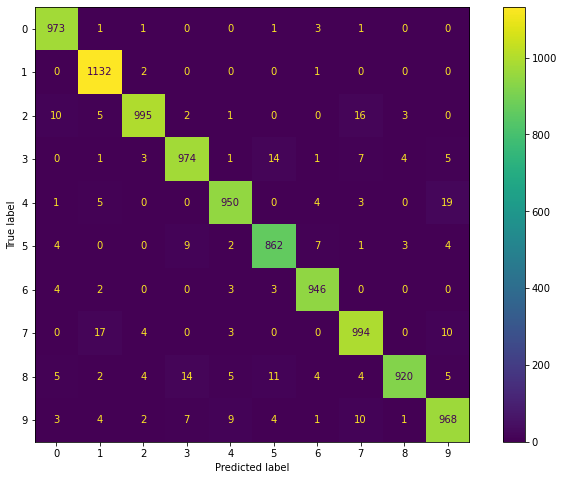

In [19]:
#create predictions for the confusion matrix
part2C_model = part2B_G_clf.fit(Xtrain2, ytrain2)
ypreds2 = part2C_model.predict(Xtest2)

#Plot a confusion matrix for the test predictions
fig, ax = plt.subplots(figsize = (12, 8))
part2_cm = confusion_matrix(ytest2, ypreds2)
part2_cmp = ConfusionMatrixDisplay(part2_cm)
part2_cmp.plot(ax = ax)
plt.show()

My results slightly support the statement that 7s and 9s are a challenging pair to distinguish. Only 10 of the pairs were misclassified, which was neither the highest amount of misclassification nor the lowest, showing at least some difficulty in classification for this number pair.

# Problem 3 {-}

In [132]:
from sklearn.metrics import top_k_accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.utils.class_weight import compute_class_weight

## Problem 3.A {-}

In [22]:
#create probability estimates for top-k accuracy
ytrain2_probs = part2C_model.predict_proba(Xtrain2)
ytest2_probs = part2C_model.predict_proba(Xtest2)
training_ks = np.empty(5)
test_ks = np.empty(5)
#get the accuracies for k = 1, 2, 3, 4, 5
for i in range(1,6):
    print("k-value:", i)
    training_ks[i-1] = top_k_accuracy_score(ytrain2, ytrain2_probs, k = i)
    test_ks[i-1] = top_k_accuracy_score(ytest2, ytest2_probs, k = i)
    print("training set score:", training_ks[i-1])
    print("test set score:", test_ks[i-1])

k-value: 1
training set score: 1.0
test set score: 0.9714
k-value: 2
training set score: 1.0
test set score: 0.9883
k-value: 3
training set score: 1.0
test set score: 0.9915
k-value: 4
training set score: 1.0
test set score: 0.9938
k-value: 5
training set score: 1.0
test set score: 0.9949


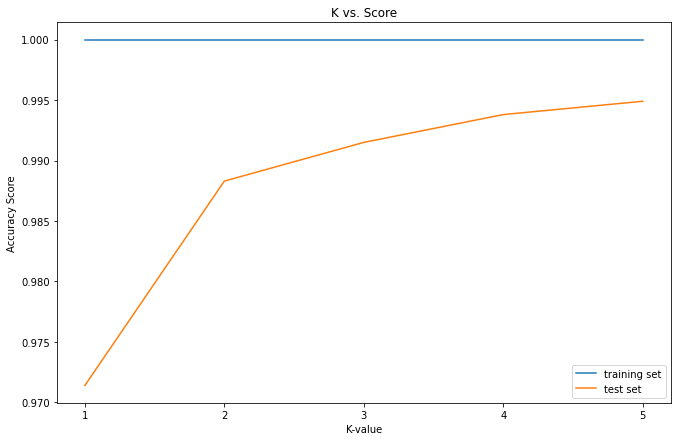

In [23]:
#plot k vs. score
plt.rcParams['figure.figsize'] = (11, 7)
x = range(1,6)
plt.plot(x, training_ks, label = "training set")
plt.plot(x, test_ks, label = "test set")

plt.title("K vs. Score")
plt.xlabel("K-value")
plt.ylabel("Accuracy Score")
plt.xticks(x)

plt.legend()
plt.show()

The accuracy monotonically increases from a low of 97.14% at k=1 to a high of 99.49% at k=5. In addition to the increasing accuracy, I think this metric is useful for the dataset as it gives another check on the test data.

## Problem 3.B {-}

In [102]:
#Remove 99% of all 9s, then set remaining 9s -> 1s and 7s -> 0s
def imbalance_data(X, y):
    nine_idx = (y == 9)
    seven_idx = (y == 7)
    #get an array of only 9s
    Xnines = X[nine_idx, :]
    ynines = y[nine_idx]
    ynines[:] = 1
    #resize the 9s arrays to remove 99% of all 9s
    Xnines_reshaped = np.resize(Xnines, (int(Xnines.shape[0] * 0.01), Xnines.shape[1]))
    ynines_reshaped = np.resize(ynines, (int(ynines.shape[0] * 0.01)))
    #get array of 7s
    Xsevens = X[seven_idx, :]
    ysevens = y[seven_idx]
    ysevens[:] = 0
    #create a new array with the reduced number of 9s added back
    X_imbalanced = np.append(Xsevens, Xnines_reshaped, axis=0)
    y_imbalanced = np.append(ysevens, ynines_reshaped)
    return X_imbalanced, y_imbalanced
    

In [103]:
#prepare the MNIST data 
Xtrain3, ytrain3 = imbalance_data(Xtrain2, ytrain2)
Xtest3, ytest3 = imbalance_data(Xtest2, ytest2)

In [104]:
#Print out the length of the filtered X and y, alongside the max value of X train and X test
print("Filtered X length:",len(Xtrain3))
print("Filtered y length:",len(ytrain3))
print("Max X training set value:", np.max(Xtrain3))
print("Max X test set value:", np.max(Xtest3))

Filtered X length: 6324
Filtered y length: 6324
Max X training set value: 1.0
Max X test set value: 1.0


## Problem 3.C {-}

In [106]:
#Repeat part 1.C using SVC and stratified cross-validation
scorings = {'score': 'accuracy',
            'f1': 'f1_weighted', 
            'prec': 'precision_weighted', 
            'rec': 'recall_weighted'}
part3C_clf = SVC(random_state = 42)
part3C_cv = StratifiedKFold(n_splits = 5)
part3C_scores = cross_validate(part3C_clf, Xtrain3, ytrain3, scoring = scorings, cv = part3C_cv)
mas.print_cv_result_dict(part3C_scores)

mean_fit_time: 0.2560379981994629, std_fit_time: 0.01733015649359653
mean_score_time: 0.06281414031982421, std_score_time: 0.002040147352848273
mean_test_score: 0.994307424826137, std_test_score: 0.0009217411199686561
mean_test_f1: 0.9929980643199452, std_test_f1: 0.001426014567934059
mean_test_prec: 0.9943407916412479, std_test_prec: 0.0009109337347141226
mean_test_rec: 0.994307424826137, std_test_rec: 0.0009217411199686561


Mean precision is ever so slightly higher than mean recall, meaning that the classifier is slightly better at not classifying false positives than it is at finding all the positive samples.

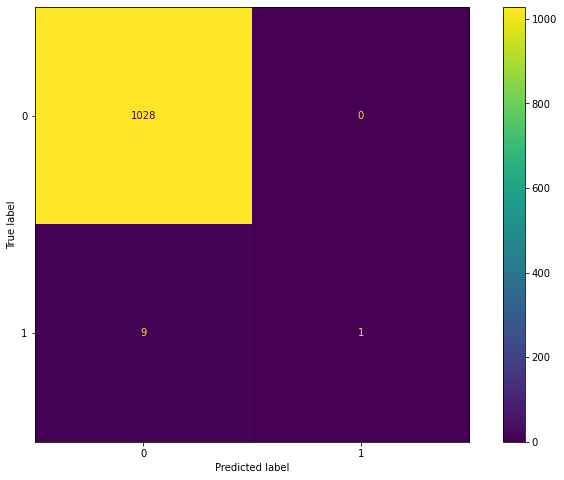

In [131]:
#Train the model to get a confusion matrix
part3C_model = part3C_clf.fit(Xtrain3, ytrain3)
ypreds3C = part3C_model.predict(Xtest3)

fig, ax = plt.subplots(figsize = (12, 8))
part3_cm = confusion_matrix(ytest3, ypreds3C)
part3_cmp = ConfusionMatrixDisplay(part3_cm)
part3_cmp.plot(ax = ax)
plt.show()

## Problem 3.D {-}

In [130]:
#Repeat part 3.C using weighted loss function
scorings = {'score': 'accuracy',
            'f1': 'f1_weighted', 
            'prec': 'precision_weighted', 
            'rec': 'recall_weighted'}
part3D_clf = SVC(class_weight = 'balanced', random_state = 42)
part3D_cv = StratifiedKFold(n_splits = 5)
part3D_scores = cross_validate(part3D_clf, Xtrain3, ytrain3, scoring = scorings, cv = part3D_cv)
mas.print_cv_result_dict(part3D_scores)

#compute the class weights
class_weights = compute_class_weight(class_weight = 'balanced', classes = np.unique(ytrain3), y = ytrain3)
print("class weights:", class_weights)
print("\n We see that ")

mean_fit_time: 0.40028977394104004, std_fit_time: 0.0137931631713967
mean_score_time: 0.10276675224304199, std_score_time: 0.0054281592619228325
mean_test_score: 0.9960466803422225, std_test_score: 0.000707897232878799
mean_test_f1: 0.9956818806668121, std_test_f1: 0.0008692132505733874
mean_test_prec: 0.995887400542671, std_test_prec: 0.0008985069030812981
mean_test_rec: 0.9960466803422225, std_test_rec: 0.000707897232878799
class weights: [ 0.5047087  53.59322034]


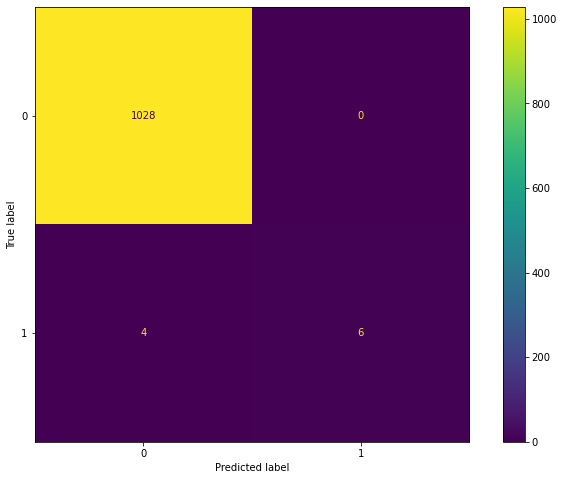

In [113]:
#Train the model to get a confusion matrix
part3D_model = part3D_clf.fit(Xtrain3, ytrain3)
ypreds3D = part3D_model.predict(Xtest3)

fig, ax = plt.subplots(figsize = (12, 8))
part3D_cm = confusion_matrix(ytest3, ypreds3D)
part3D_cmp = ConfusionMatrixDisplay(part3D_cm)
part3D_cmp.plot(ax = ax)
plt.show()

We see that the weighted loss function gets us better values on average for all scoring metrics at the expense of slightly longer computation time.